# Question 1: In 2-D space, there are two equiprobable classes with means $m_{1} = [0, 0]$ and $m_{2} = [1.5, 1.5]$, and covariance matrices $S_{1} = S_{2} = 0.2I$, where $I$ is a 2x2 identity matrix.

#### a) Generate and plot a dataset $X_{1}$ containing 200 examples per class (400 in total) to be used as a training set (use the value 10 as the seed and the randn Numpy function). Generate a second dataset $X_{2}$ containing 200 examples per class to be used as a test set (use the value 100 as the seed and the randn Numpy function).

#### b) Based on $X_{1}$, generate six SVM classifiers to separate the two classes, varying $C = 0.1, 0.2, 0.5, 1, 2, 20$. Use the Platt algorithm (SMO2.m) with $tol = 0.001$.
- Calculate the classification errors for the training and test sets.
- Count the number of support vectors.
- Calculate the value of the margin (2/||w||).
- Plot the classifier along with the margins. Comment on the results obtained in the previous steps. What is the influence of the parameter C?

In [2]:
import numpy as np
from sklearn import svm

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(100)

def generate_data(seed, n_samples):
    np.random.seed(seed)
    m1 = [0, 0]
    m2 = [1.5, 1.5]
    cov = 0.2 * np.identity(2)

    data1 = np.random.multivariate_normal(m1, cov, n_samples)
    data2 = np.random.multivariate_normal(m2, cov, n_samples)
    return data1, data2

In [3]:
X1_train, X2_train = generate_data(seed=10, n_samples=200)
X1_test, X2_test = generate_data(seed=100, n_samples=200)
y1_train, y2_train = np.zeros(len(X1_train)), np.ones(len(X2_train))
y1_test, y2_test = np.zeros(len(X1_test)), np.ones(len(X2_test))

X_train, y_train = np.vstack((X1_train, X2_train)), np.hstack((y1_train, y2_train))
X_test, y_test = np.vstack((X1_test, X2_test)), np.hstack((y1_test, y2_test))

print(f"Amount of samples train set: {len(X_train)}, Train targets: {len(y_train)}")
print(f"Amount of samples test set: {len(X_test)}, Test target: {len(y_test)}")
print(f"Number of features: {X_train.shape[1]}")

Amount of samples train set: 400, Train targets: 400
Amount of samples test set: 400, Test target: 400
Number of features: 2


In [4]:
def plot_dataset():
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train[:200, 0], X_train[:200, 1], label="Class 1 (Train)", marker='o', c='darkblue')
    plt.scatter(X_train[200:, 0], X_train[200:, 1], label="Class 2 (Train)", marker='x', c="darkred")
    plt.scatter(X_test[:200, 0], X_test[:200, 1], label="Class 1 (Test)", marker='o', c='darkgreen')
    plt.scatter(X_test[200:, 0], X_test[200:, 1], label="Class 2 (Test)", marker='x', c="y")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.title("Dataset distribution")
    plt.grid()
    plt.show()

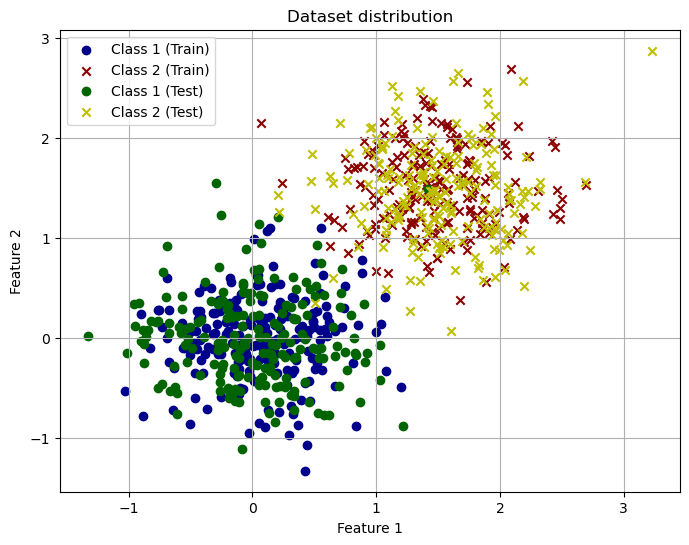

In [5]:
plot_dataset()

Using SVM with the hyperparameter ask in question b

In [6]:
C_values = [0.1, 0.2, 0.5, 1, 2, 20]
clfs = []
def train_classifiers():
    for C in C_values:
        clf = svm.SVC(C=C, kernel="linear", tol=0.001)
        clf.fit(X_train, y_train)
        clfs.append(clf)

train_classifiers()

In [17]:
train_errors, test_errors = [], []
s_vec, margins = [], []

def evaluate():
    for clf in clfs:
        train_pred = clf.predict(X_train)
        test_pred = clf.predict(X_test)

        train_error = np.mean(train_pred != y_train)
        test_error = np.mean(test_pred != y_test)
    
        train_errors.append(train_error)
        test_errors.append(test_error)

        s_vec.append(len(clf.support_vectors_))
        margins.append(2 / np.linalg.norm(clf.coef_))

evaluate()

In [23]:
def plot_results():
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 3, 1)
    plt.plot(C_values, train_errors, marker='o', label="Train Error")
    plt.plot(C_values, test_errors, marker='x', label="Test Error")
    plt.xlabel("C Values")
    plt.ylabel("Error Rate")
    plt.legend()
    plt.title("Error Classification")
    
    plt.subplot(1, 3, 2)
    plt.plot(C_values, s_vec, marker='o')
    plt.xlabel("C Values")
    plt.ylabel("Number of Support Vectors")
    plt.title("Support Vectors")
    
    plt.subplot(1, 3, 3)
    plt.plot(C_values, margins, marker='o')
    plt.xlabel("Margin with norm 2 ||w||")
    plt.ylabel("Margin")
    
    plt.tight_layout()
    plt.show()

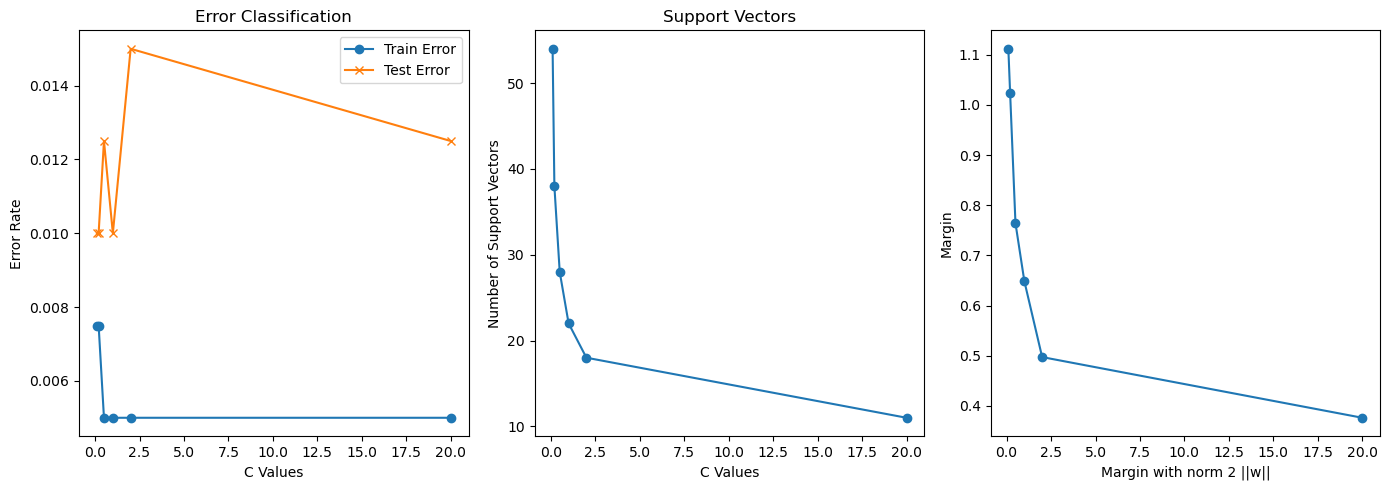

In [24]:
plot_results()

# Question 2: This problem is divided into five steps, listed as follows:

#### a) Generate a two-dimensional dataset X1 (training) as follows. Select 150 points in a two-dimensional space in the region defined by [-5, 5] × [-5, 5], following a uniform distribution (in the rand function of MATLAB, set the "seed" equal to zero). Label the point x = [x(1), x(2)]T with the class +1 (-1) according to the rule 0.05(x3(1) + x2(1) + x(1) + 1) > (<) x(2) (Clearly, the classes are not linearly separable. In fact, they are separated by the curve associated with the equation 0.05(x3(1) + x2(1) + x(1) + 1) = x(2). Plot the data of X1 (training). Generate an additional set X2 (test) using the same description as X1 (in the rand function of MATLAB, set the "seed" equal to 100).


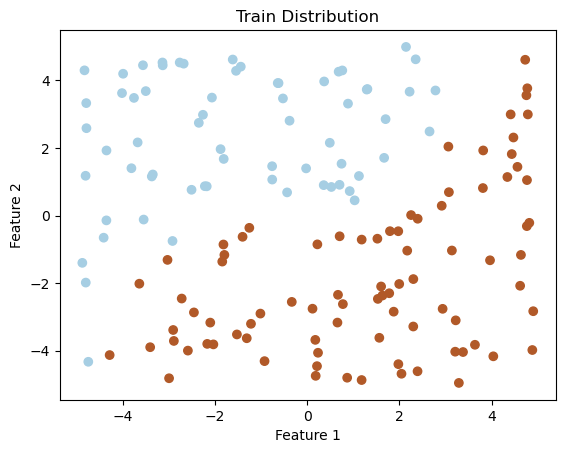

In [4]:
def generate_dataset(seed=0):
    np.random.seed(seed)
    X = np.random.uniform(-5, 5, (150, 2))
    y = np.where(0.05*(X[:, 0]**3 + X[:, 0]**2+X[:,0]+1) > X[:, 1], 1, -1)
    return X, y


def plot_dataset_distribution(X, y, title):
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

X_train, y_train = generate_dataset()

plot_dataset_distribution(X_train, y_train, title="Train Distribution")

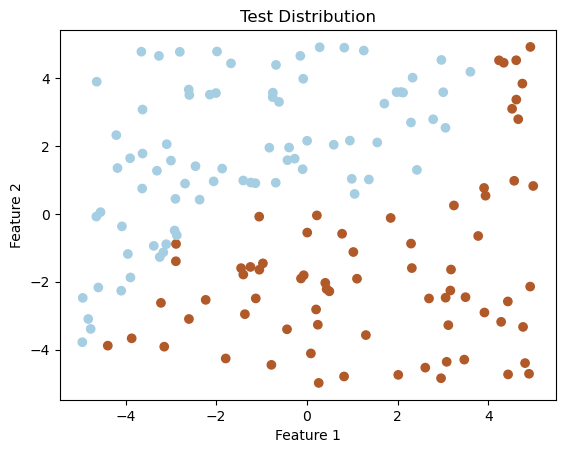

In [5]:
X_test, y_test = generate_dataset(seed=100)
plot_dataset_distribution(X_test, y_test, title="Test Distribution")


#### b) Construct a linear SVM classifier with parameters C = 2 and tol = 0.001. Calculate the training and test classification errors and the number of support vectors in each case. Plot the decision regions defined by the classifier and the corresponding margins.

In [89]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [90]:
clf = SVC(kernel="linear", C=2, tol=0.001)
clf.fit(X_train, y_train)

SVC(C=2, kernel='linear')

In [91]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

acc_train = accuracy_score(y_train, train_pred)
acc_test = accuracy_score(y_test, test_pred)

print("Classification Error")
print(f"Train error: {(1-acc_train):0.4f}")
print(f"Test error: {(1-acc_test):0.4f}")

Classification Error
Train error: 0.0867
Test error: 0.0933


In [107]:
def plot_decision_boundary(clf, X, y, linear=True):

    # xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    # pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # pred = pred.reshape(xx.shape)
    if (linear):
        w = clf.coef_[0]
        a = -w[0] / w[1]
        xx = np.linspace(-5, 5)
        yy = a * xx - (clf.intercept_[0]) / w[1]

        # plot the parallels to the separating hyperplane that pass through the
        # support vectors (margin away from hyperplane in direction
        # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
        # 2-d.
        margin = 1 / np.sqrt(np.sum(clf.coef_**2))
        yy_down = yy - np.sqrt(1 + a**2) * margin
        yy_up = yy + np.sqrt(1 + a**2) * margin
        plt.clf()
        plt.plot(xx, yy, "k-")
        plt.plot(xx, yy_down, "k--")
        plt.plot(xx, yy_up, "k--")
    else:
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

        # Plot decision boundaries and margins
        plt.contour(xx, yy, Z, colors='black', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
        
    


    # plot the line, the points, and the nearest vectors to the plane
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.scatter(
        clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
        s=80, facecolors="none", zorder=10, edgecolors="k",
    )
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary and Margins")
    plt.show()


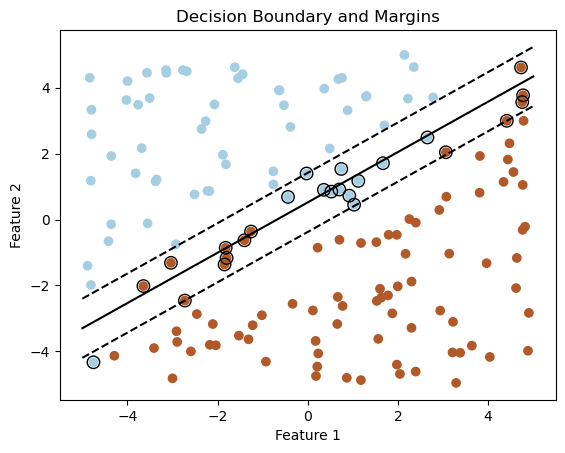

In [93]:
plot_decision_boundary(clf, X_train, y_train)

#### c) Construct a non-linear SVM classifier (RBF kernel) with parameters C = 2, tol = 0.001, σ = 0.1, and 2. Calculate the training and test classification errors and the number of support vectors in each case. Plot the decision regions defined by the classifier.

In [94]:
clf = SVC(kernel="rbf", C=2, tol=0.001, gamma=0.1)
clf.fit(X_train, y_train)

SVC(C=2, gamma=0.1)

In [95]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

acc_train = accuracy_score(y_train, train_pred)
acc_test = accuracy_score(y_test, test_pred)

print("Classification Error")
print(f"Train error: {(1-acc_train):0.4f}")
print(f"Test error: {(1-acc_test):0.4f}")

Classification Error
Train error: 0.0133
Test error: 0.0467


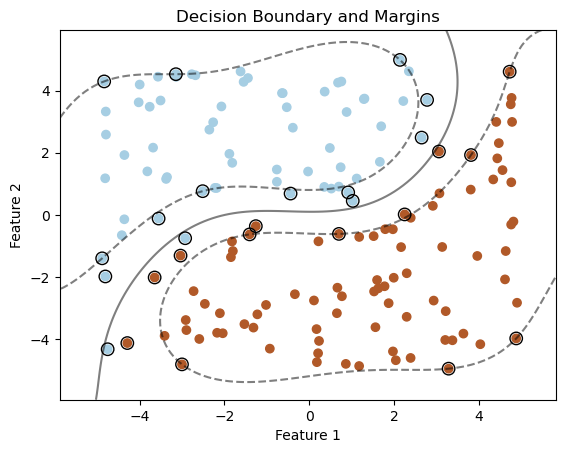

In [108]:
plot_decision_boundary(clf, X_train, y_train, linear=False)

#### d) Construct a non-linear SVM classifier with an RBF kernel and parameters σ = 1.5 and with a polynomial kernel and parameters n = 3 and β = 1. In both cases, use tol = 0.001 and C = 0.2, 20, 200. Compare and comment on the results.

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
param_grid_rbf = {'C': [0.2, 20, 200], "gamma": [1.5]}
param_grid_poly = {'C': [0.2, 20, 200], "degree": [3], "coef0": [1]}

clf_rbf = SVC(kernel="rbf", tol=0.001)
clf_poly = SVC(kernel="poly", tol=0.001)


In [112]:
grid_search_rbf = GridSearchCV(clf_rbf, param_grid_rbf, cv=10)
grid_search_rbf.fit(X_train, y_train)

grid_search_poly = GridSearchCV(clf_poly, param_grid_poly, cv=10)
grid_search_poly.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(kernel='poly'),
             param_grid={'C': [0.2, 20, 200], 'coef0': [1], 'degree': [3]})

In [119]:
print("Non-linear SVM (RBF Kernel):")
print(f"Best Parameters: {grid_search_rbf.best_params_}")
print(f"Best Cross-Validation Score: {grid_search_rbf.best_score_:0.4f}")
print(f"Test Accuracy (C=0.2): {accuracy_score(y_test, grid_search_rbf.best_estimator_.predict(X_test)):0.4f}")

Non-linear SVM (RBF Kernel):
Best Parameters: {'C': 20, 'gamma': 1.5}
Best Cross-Validation Score: 0.9600
Test Accuracy (C=0.2): 0.9400


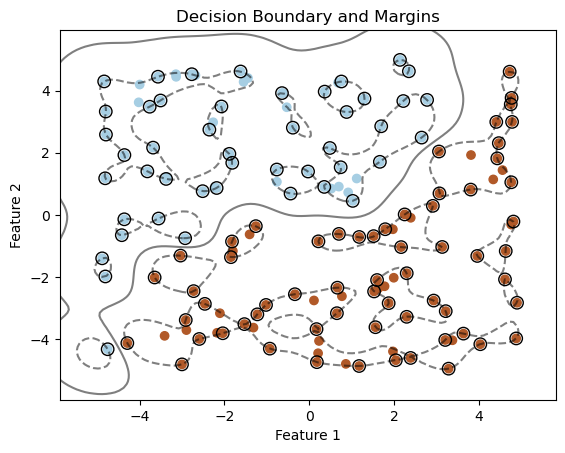

In [116]:
plot_decision_boundary(grid_search_rbf.best_estimator_, X_train, y_train, linear=False)

In [118]:
print("Non-linear SVM (Polynomial Kernel):")
print(f"Best Parameters: {grid_search_poly.best_params_}")
print(f"Best Cross-Validation Score: {grid_search_poly.best_score_:0.4f}")
print(f"Test Accuracy (C=0.2): {accuracy_score(y_test, grid_search_poly.best_estimator_.predict(X_test)):0.4f}")

Non-linear SVM (Polynomial Kernel):
Best Parameters: {'C': 0.2, 'coef0': 1, 'degree': 3}
Best Cross-Validation Score: 0.9867
Test Accuracy (C=0.2): 0.9400


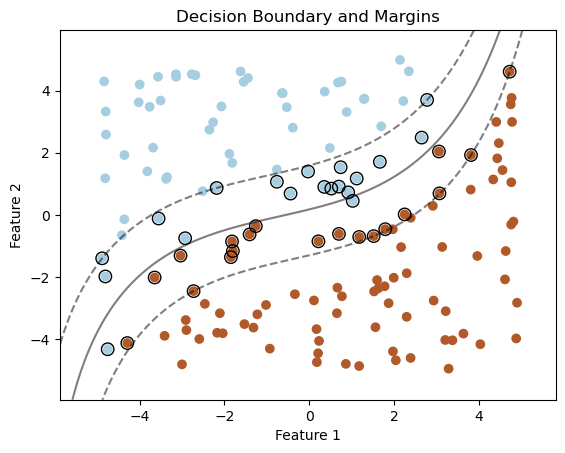

In [117]:
plot_decision_boundary(grid_search_poly.best_estimator_, X_train, y_train, linear=False)

As you can see, the Non-linear SVM (RBF Kernel) with the follow parameters: {'C': 20, 'gamma': 1.5}, got overfitting, in other words, the Non-linear SVM (Polynomial Kernel) with the follow parameters: {'C': 0.2, 'coef0': 1, 'degree': 3} appears to be good generalatization for support vectors.

# Question 3: Consider a two-dimensional classification problem involving three classes ω1, ω2, and ω3. The examples from class ω1 have a distribution composed of two Gaussians with parameters µ11, µ12, Σ11, and Σ12. Similarly, the examples from class ω2 have a distribution composed of two Gaussians with parameters µ21, µ22, Σ21, and Σ22. Class ω3, on the other hand, has a distribution composed of a Gaussian with parameters µ3 and Σ3. The parameter values are represented below:

$\Sigma{11} = [[0.2, 0][0, 2]]$

$\Sigma{21} = [[5, 0][0, 0.5]]$

$\Sigma{31} = [[8, 0][0, 0.5]]$

$\Sigma{12} = [[3, 0][0, 0.5]]$

$\Sigma{22} = [[7, 0][0, 0.5]]$

µ11 = [0, 3]T
µ12 = [11, -2]T
µ22 = [7.5, 4]T
µ3 = [7, 2]T
µ21 = [3, -2]T



#### a) Generate a training data set X with 1000 points for ω1 (500 from each distribution), 1000 points for ω2 (500 from each distribution), and 500 points for ω3 (use 0 as the seed parameter for initializing the random number generator following the Gaussian distribution of Matlab). Similarly, generate a test set Xtest (use 100 as the seed parameter for this set). Plot the results.

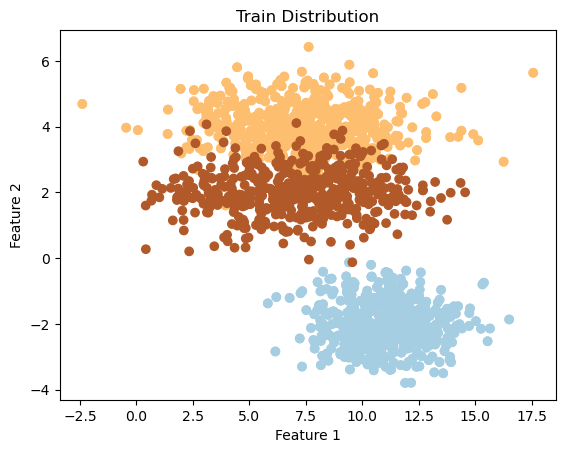

In [124]:
def generate_dataset(seed=0):
    np.random.seed(seed)
    # class w1
    mean_11, mean_12 = np.array([0, 3]), np.array([11, -2])
    cov_11, cov_12 = np.array([[0.2, 0], [0, 2]]), np.array([[3, 0], [0, 0.5]])
    x_11 = np.random.multivariate_normal(mean_11, cov_11, 500)
    x_12 = np.random.multivariate_normal(mean_12, cov_12, 500)
    x_1 = np.vstack((x_12, x_12))
    # class w2
    mean_21, mean_22 = np.array([0, 3]), np.array([7.5, 4])
    cov_21, cov_22 = np.array([[5, 0], [0, 0.5]]), np.array([[7, 0], [0, 0.5]])
    x_21 = np.random.multivariate_normal(mean_21, cov_21, 500)
    x_22 = np.random.multivariate_normal(mean_22, cov_22, 500)
    x_2 = np.vstack((x_22, x_22))
    # class w3
    mean_3 = np.array([7, 2])
    cov_3 = np.array([[8, 0], [0, 0.5]])
    x_3 = np.random.multivariate_normal(mean_3, cov_3, 500)
    
    X = np.vstack((x_1, x_2, x_3))
    y_1, y_2, y_3 = np.zeros(len(x_1)), np.ones(len(x_2)), np.full(len(x_3), 2)
    y = np.hstack((y_1, y_2, y_3))
    return X, y


def plot_dataset_distribution(X, y, title):
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

X_train, y_train = generate_dataset()

plot_dataset_distribution(X_train, y_train, title="Train Distribution")

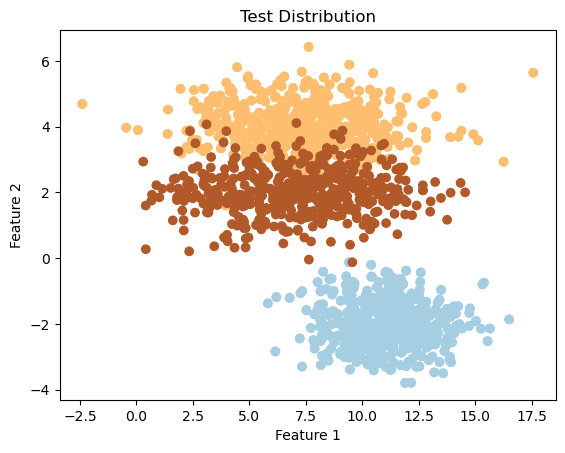

In [125]:
X_test, y_test = generate_dataset(seed=100)

plot_dataset_distribution(X_train, y_train, title="Test Distribution")

#### b) Implement and visualize a Decision Tree using the set X.

In [127]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [128]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

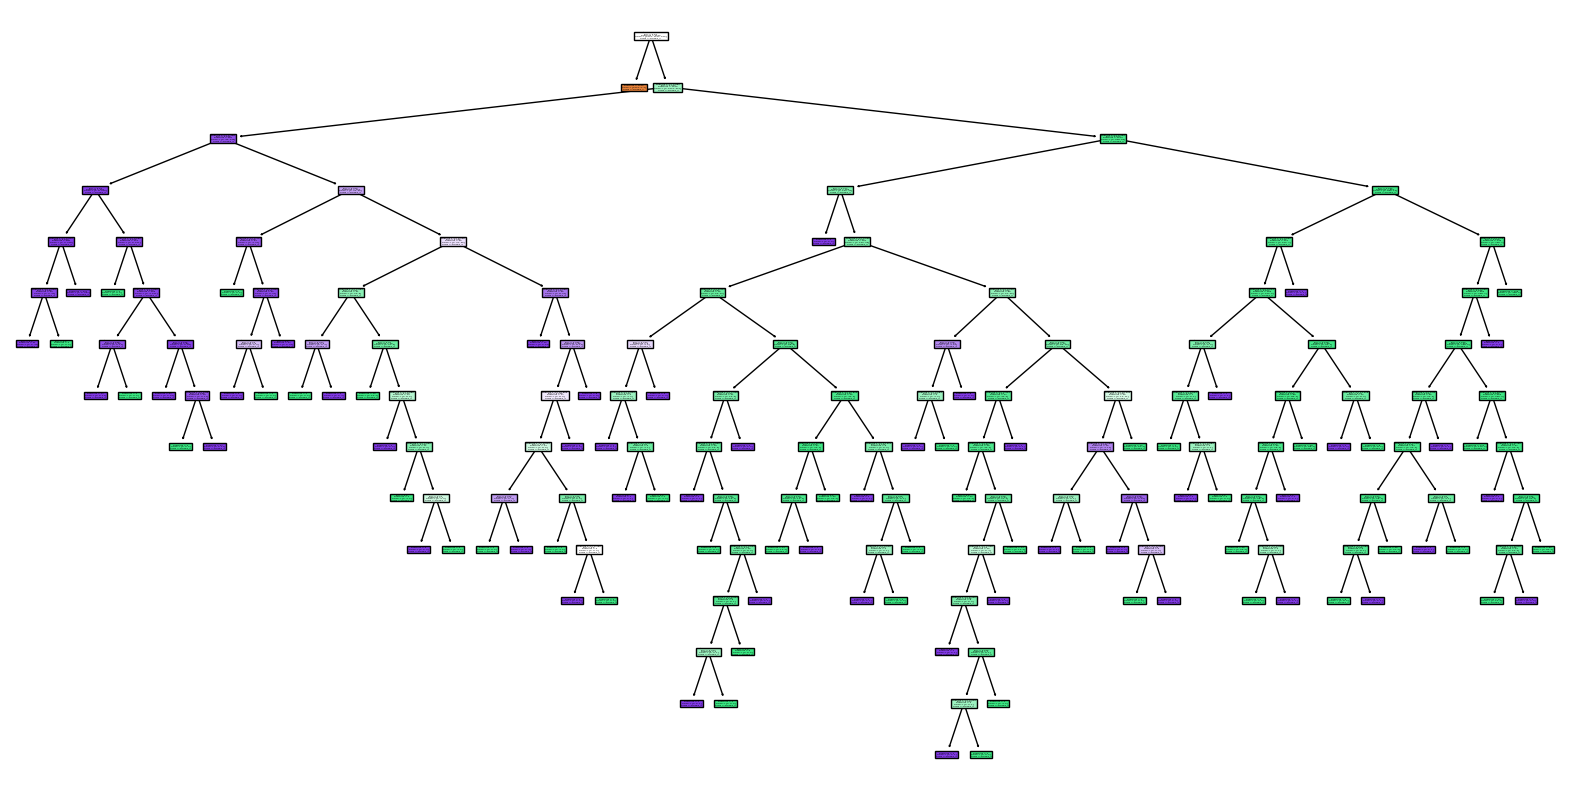

In [130]:
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=["Feature 1", "Feature 2"], class_names=['omega_1', 'omega_2', 'omega_3'])
plt.show()

#### c) Calculate the training and test classification errors and comment on the results.

In [131]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

acc_train = accuracy_score(y_train, train_pred)
acc_test = accuracy_score(y_test, test_pred)

print("Classification Error")
print(f"Train error: {(1-acc_train):0.4f}")
print(f"Test error: {(1-acc_test):0.4f}")

Classification Error
Train error: 0.0000
Test error: 0.0712


The decision tree appear to overfitting, because in the test set the erro increase 7%.

#### d) Prune the tree at levels 0 (no pruning), 1, ..., 11. For each pruned tree, calculate the classification error on the test set.

In [137]:
# Pruning levels
def prune_tree(max_depth=12):
    test_errors = []
    train_errors = []
    pruning_levels = range(1, max_depth)

    for l in pruning_levels:
        clf = DecisionTreeClassifier(max_depth=l)
        clf.fit(X_train, y_train)
        train_pred = clf.predict(X_train)
        test_pred = clf.predict(X_test)
        train_errors.append((1 - accuracy_score(y_train, train_pred)))
        test_errors.append((1 - accuracy_score(y_test, test_pred)))
    
    return train_errors, test_errors

In [138]:
train_errors, test_errors = prune_tree()

#### e) Plot the classification errors and pruning levels and determine which level yields the best classification performance. What conclusions can be drawn from analyzing this graph?

In [143]:
def plot_prune_level(max_depth=12):
    pruning_levels = range(1, max_depth)
    # Plot classification errors vs. pruning levels
    plt.plot(pruning_levels, train_errors, marker='o')
    plt.plot(pruning_levels, test_errors, marker='o')
    plt.xlabel('Pruning Level')
    plt.ylabel('Classification Error')
    plt.title('Classification Errors vs. Pruning Levels')
    plt.grid(True)
    plt.show()

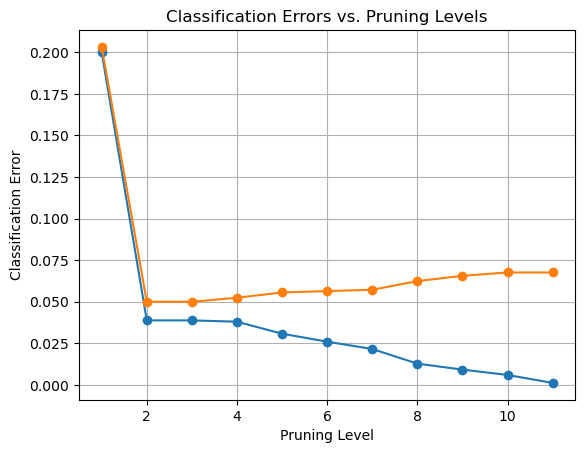

In [144]:
plot_prune_level()

#### f) Visualize the decision trees (the one from item II and the one with the best result from item V).

In [147]:
clf_prune_2 = DecisionTreeClassifier(max_depth=2)
clf_prune_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

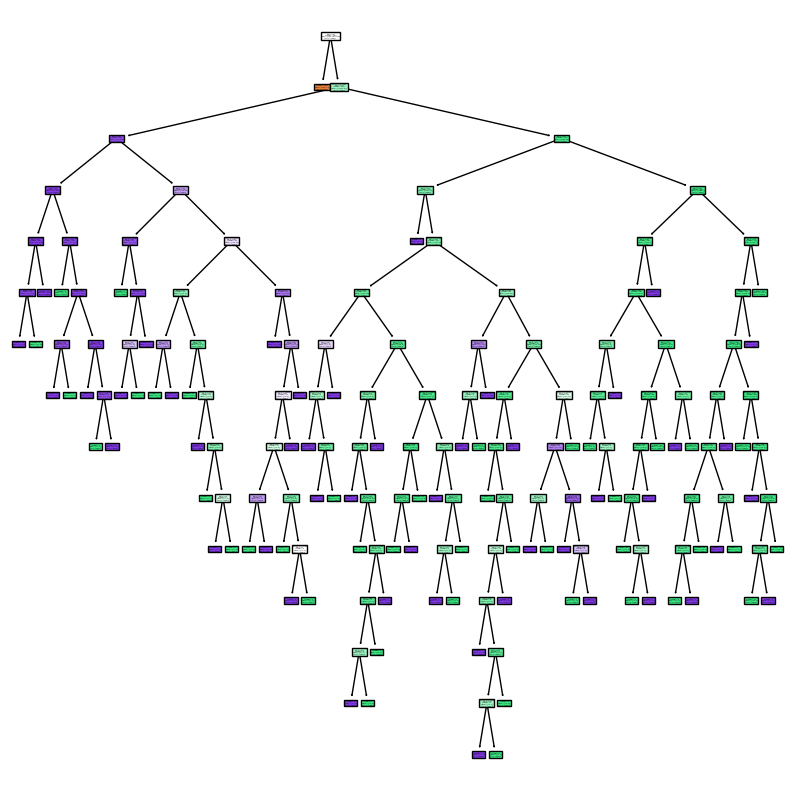

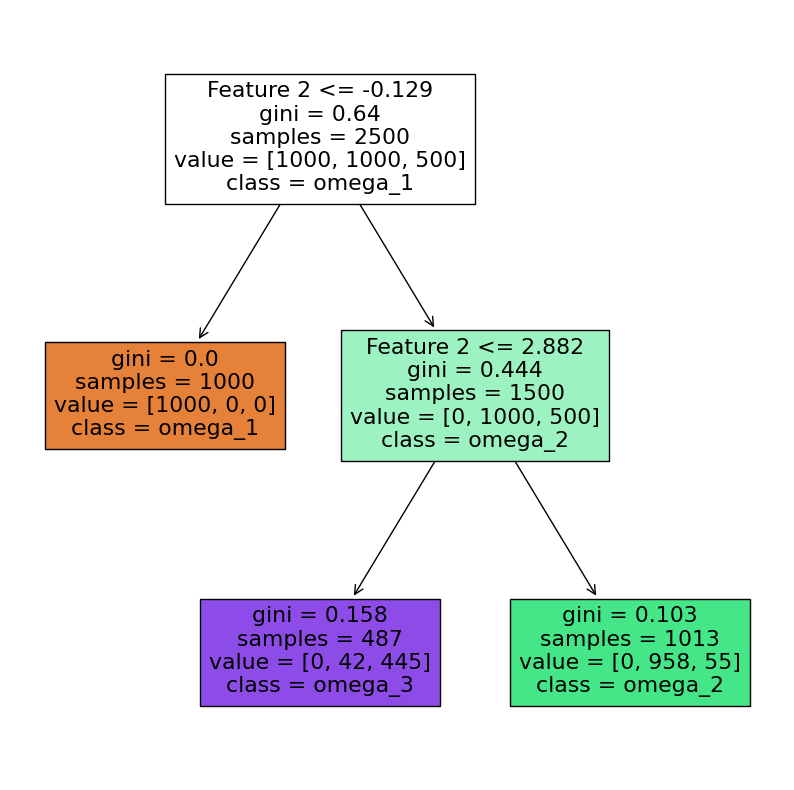

In [149]:
plt.figure(figsize=(10, 10))
plot_tree(clf, filled=True, feature_names=["Feature 1", "Feature 2"], class_names=['omega_1', 'omega_2', 'omega_3'])
plt.show()
plt.figure(figsize=(10, 10))
plot_tree(clf_prune_2, filled=True, feature_names=["Feature 1", "Feature 2"], class_names=['omega_1', 'omega_2', 'omega_3'])
plt.show()

Using the prune level as `max_depth = 2` we got 4 split, and thi look better for explain unlike the default hyperparameter choice.

# Question 4: Generate a set of two-dimensional data points X with 400 points distributed around two concentric circles. The first 200 points should be around a circle with a radius of 3 centered at (0, 0). The remaining points should be around a circle with a radius of 6 centered at (1, 1). Apply a spectral clustering algorithm with a Gaussian similarity measure considering ε=1.5 and σ=2, and plot the results. Change ε and σ and run it again. What is the effect of ε and σ on the results?

In [3]:
from sklearn.datasets import make_circles

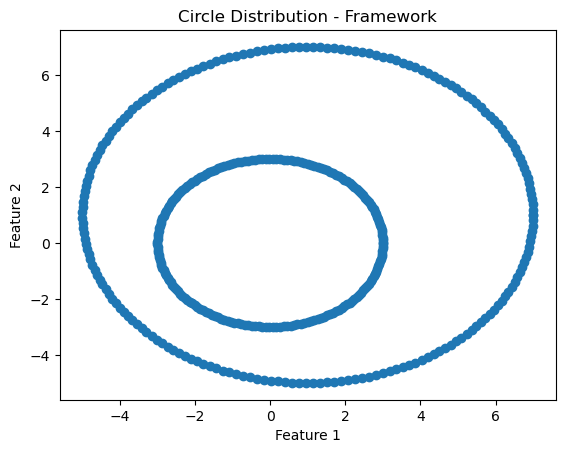

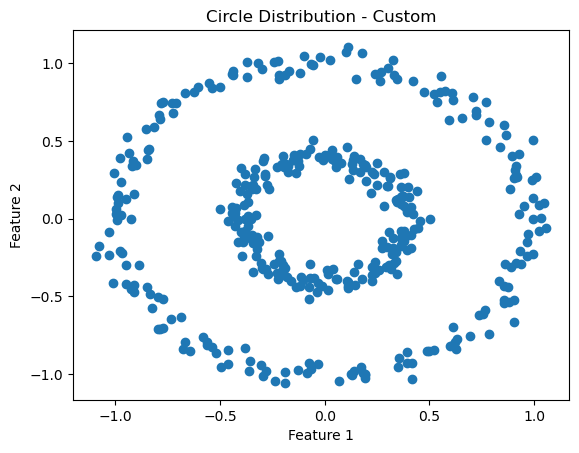

In [4]:
def generate_dataset(seed=0, framework=True):
    np.random.seed(seed)
    if (framework):
        X, _ = make_circles(n_samples=400, factor=0.4, noise=0.05)
    else:
        radius_1, center_1 = 3, (0, 0)
        radius_2, center_2 = 6, (1, 1)
        theta_1, theta_2 = np.linspace(0, 2*np.pi, 200), np.linspace(0, 2*np.pi, 200)
        x_11 = center_1[0] + radius_1 * np.cos(theta_1)
        x_12 = center_1[1] + radius_1 * np.sin(theta_1)
        x_21 = center_2[0] + radius_2 * np.cos(theta_2)
        x_22 = center_2[1] + radius_2 * np.sin(theta_2)
        X = np.vstack((np.column_stack((x_11, x_12)), np.column_stack((x_21, x_22))))
    return X

def plot_dataset_distribution(X, title):
    plt.scatter(X[:,0], X[:,1])
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

data = generate_dataset(framework=False)
plot_dataset_distribution(data, title="Circle Distribution - Framework")
data = generate_dataset(framework=True)
plot_dataset_distribution(data, title="Circle Distribution - Custom")

We will use the second approach, because its more correlated to the exercise ask.

**Apply Spectracl Clustering with Gaussian Mixture**

In [5]:
from sklearn.cluster import SpectralClustering

In [6]:
def perform_clustering_algorithm(X, sigma, epsilon):
    spec_cluster = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1/(2*sigma**2), 
        # epsilon=epsilon
    )
    pred = spec_cluster.fit_predict(X)
    return pred

def plot_results(X, pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:,0], X[:,1], c=pred, marker='o', s=20, cmap="viridis")
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

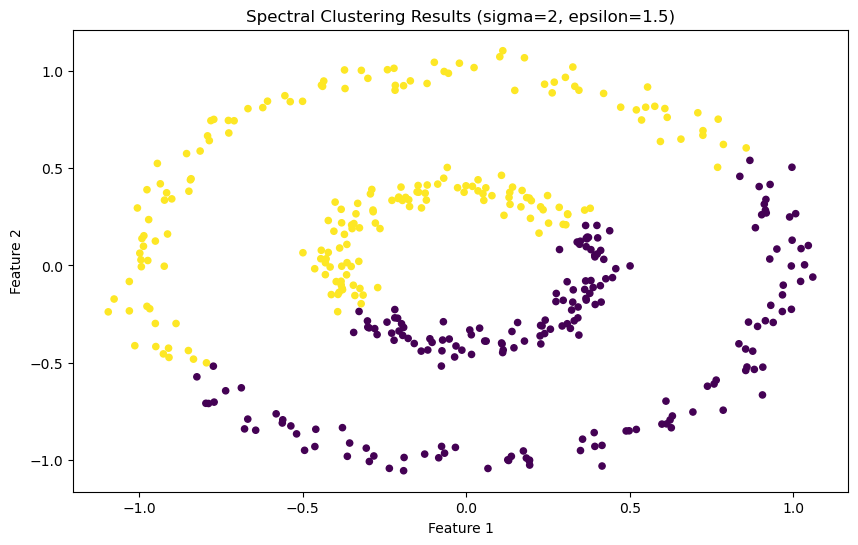

In [7]:
pred = perform_clustering_algorithm(data, sigma=2, epsilon=1.5)
plot_results(data, pred, title=f"Spectral Clustering Results (sigma={2}, epsilon={1.5})")

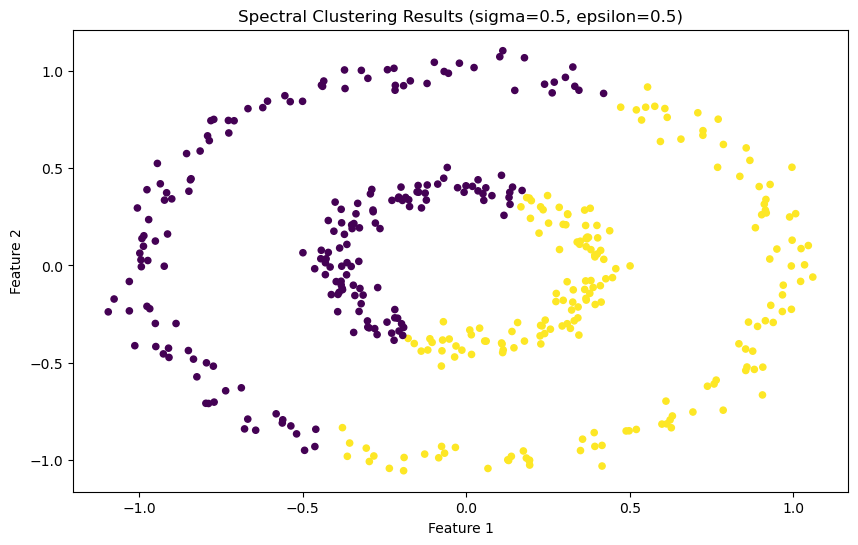

In [8]:
pred = perform_clustering_algorithm(data, sigma=0.5, epsilon=0.5)
plot_results(data, pred, title=f"Spectral Clustering Results (sigma={0.5}, epsilon={0.5})")

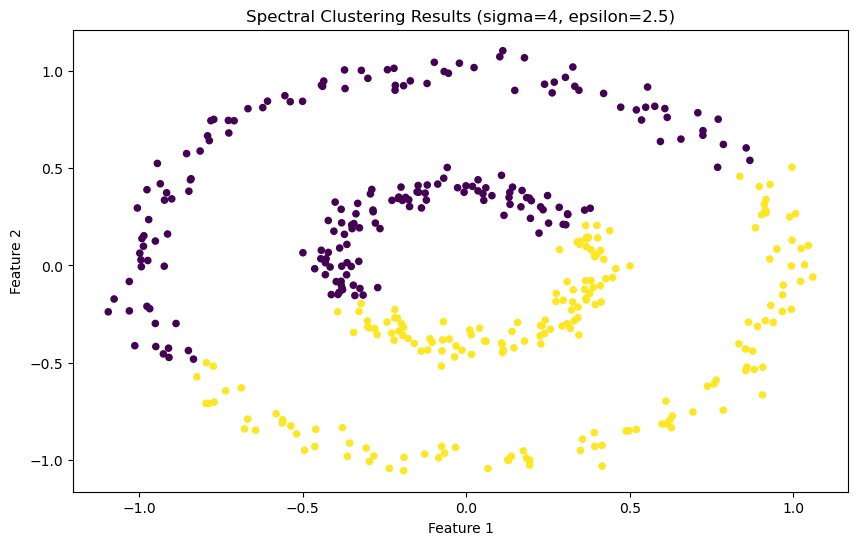

In [9]:
pred = perform_clustering_algorithm(data, sigma=4, epsilon=2.5)
plot_results(data, pred, title=f"Spectral Clustering Results (sigma={4}, epsilon={2.5})")

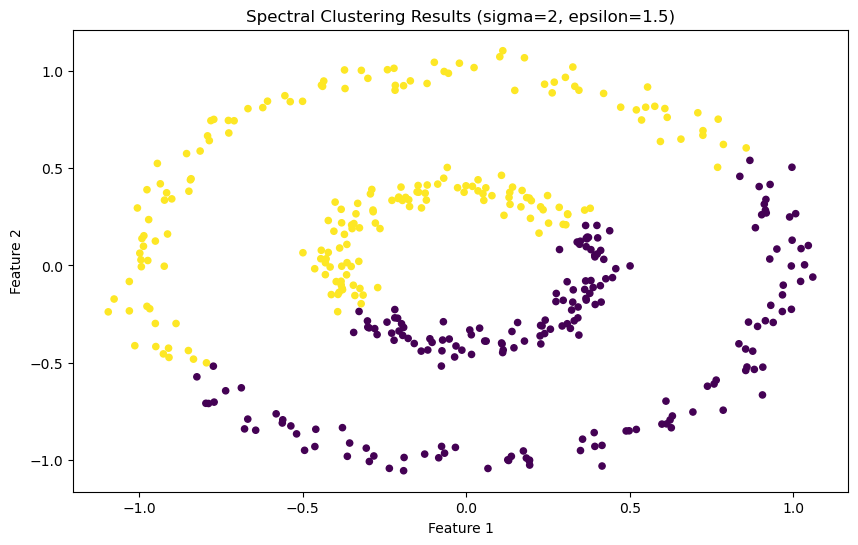

In [10]:
pred = perform_clustering_algorithm(data, sigma=2, epsilon=1.5)
plot_results(data, pred, title=f"Spectral Clustering Results (sigma={2}, epsilon={1.5})")

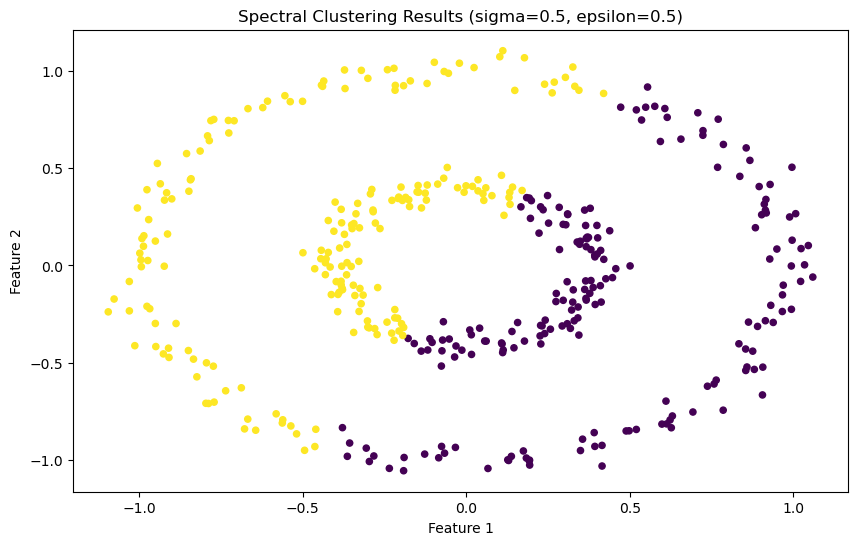

In [11]:
pred = perform_clustering_algorithm(data, sigma=0.5, epsilon=0.5)
plot_results(data, pred, title=f"Spectral Clustering Results (sigma={0.5}, epsilon={0.5})")

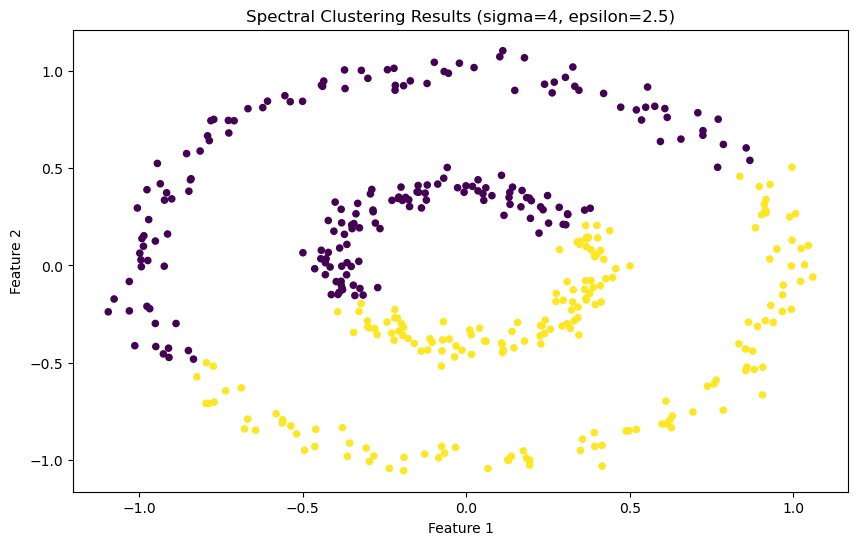

In [12]:
pred = perform_clustering_algorithm(data, sigma=4, epsilon=2.5)
plot_results(data, pred, title=f"Spectral Clustering Results (sigma={4}, epsilon={2.5})")

In the custom dataset we can se if we increase the gamma greater than 0.5 we got more samples, including the lowest circle. In other hand, in the framework dataset generate we change the rotation of the clustering results.

# Question 5: Generate a dataset of N = 100 vectors with a dimensionality of l = 2000. The vectors are sampled from a Gaussian distribution with a mean equal to the zero vector of l dimensions and a diagonal covariance matrix, S, where all its elements are non-zero and equal to 0.1 except for S(1,1) and S(2,2), which are equal to 10,000. Apply PCA (Principal Component Analysis) and SVD (Singular Value Decomposition) to this dataset. What is the relationship between these methods? Specifically, how can you obtain directions of maximum variance from SVD? Compare the results in terms of computational time.

In [13]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.linalg import svd
import time
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def generate_dataset(seed=0):
    np.random.seed(seed)
    mean = np.zeros(2000)
    cov = np.diag([10000]*2 + [0.1]*(2000 - 2))
    X = np.random.multivariate_normal(mean, cov, 100)
    return X

def plot_dataset_distribution(X, title):
    plt.scatter(X[:,0], X[:,1])
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

X = generate_dataset()
tsne = TSNE(n_components=2,
            init='pca',
            random_state=42)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_tsne = tsne.fit_transform(X_tsne)
plot_dataset_distribution(X_tsne, title="Data Distribution")


In [15]:
print(f"Shape of dataset: {X.shape}")

Shape of dataset: (100, 2000)


In [16]:
def eigen_decomposition():
    cov_mat = np.cov(X_std.T)
    eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
    return eigen_vals, eigen_vecs

In [17]:
eigen_vals, eigen_vecs = eigen_decomposition()

In [18]:
def plot_total_explained_variance(threshold=50):
    total = sum(eigen_vals)
    var_exp = [(i/total) for i in sorted(eigen_vals, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)

    plt.bar(range(1, threshold+1), var_exp[:threshold], align="center", label="Individual explained variance")
    plt.step(range(1, threshold+1), cum_var_exp[:threshold], where="mid", label="Individual explained variance")
    plt.ylabel("Explained variance ratio")
    plt.xlabel("Principal component index")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

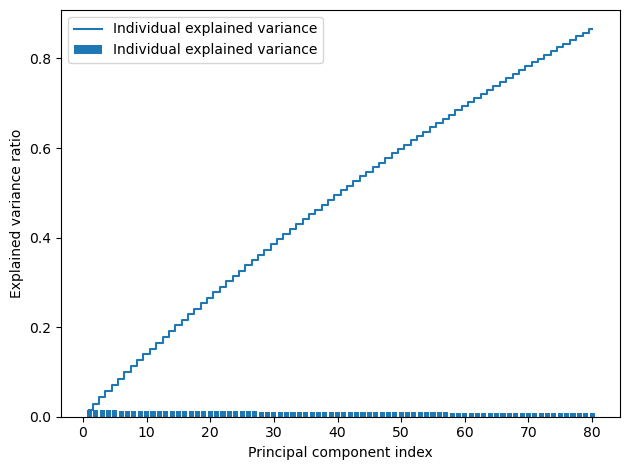

In [19]:
plot_total_explained_variance(threshold=80)

In [20]:
start_time = time.time()
pca = PCA()
pca.fit(X_std)
pca_time = time.time() - start_time

In [21]:
def plot_total_explained_variance(threshold=50):
    plt.bar(range(1, threshold+1), pca.explained_variance_ratio_[:threshold], align='center')
    plt.step(range(1, threshold+1), np.cumsum(pca.explained_variance_ratio_[:threshold]), where='mid')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')

    plt.show()

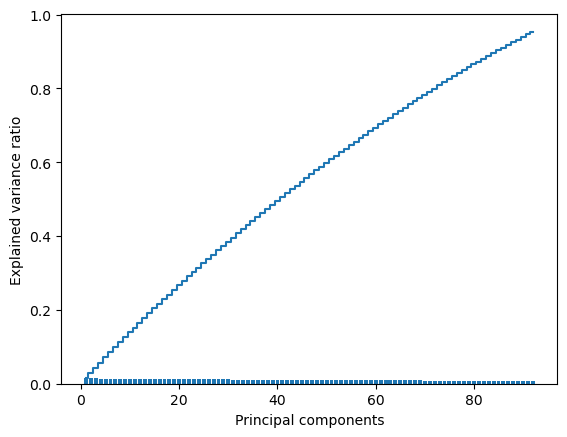

In [22]:
plot_total_explained_variance(threshold=92)

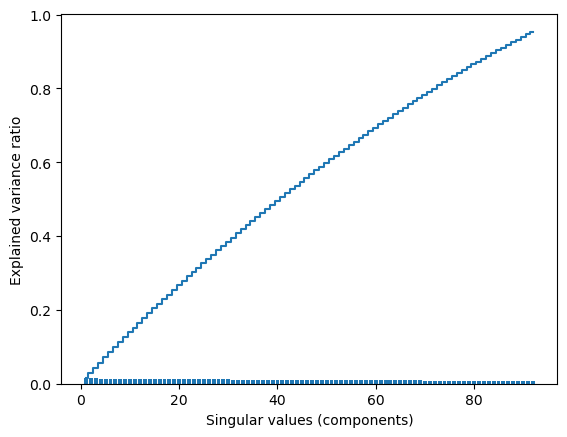

In [250]:
start_time = time.time()
u, s, vt = svd(X_std, full_matrices=False)
svd_time = time.time() - start_time
explained_variance_ratio = (s ** 2) / np.sum(s ** 2)

def plot_total_explained_variance(threshold=50):
    plt.bar(range(1, threshold + 1), explained_variance_ratio[:threshold], align="center")
    plt.step(range(1, threshold + 1), np.cumsum(explained_variance_ratio[:threshold]), where="mid")
    plt.ylabel("Explained variance ratio")
    plt.xlabel("Singular values (components)")

    plt.show()

plot_total_explained_variance(threshold=92)

In [252]:
print(f"PCA Computational Time: {pca_time:0.4f} seconds")
print(f"SVD Computational Time: {svd_time:0.4f} seconds")

PCA Computational Time: 0.1061 seconds
SVD Computational Time: 0.0576 seconds


The relationship between PCA and SVD that the first one is a statistical technique that the goal to find the Principal Components in the dataset to capture the maximum variance. In other hand, SVD is a linear algebra technique that decomposes a matrix into three other matrices: U (contain the principal components), $\Sigma$ contain singular values that means the square roots of the eigen values of the covariance matrix, and $V^{T}$ will be related to the loadings of each principal component.

So, the goal of each technique can be described as follow:
- PCA: provides the PCs and their corresponding eigenvalues (explained variance) ordered by significance. So, the goal is to projecting the data onto new dimensions preserves as much variance as possible.
- SVD: provides three matrices as mentioned before, in summary is a general matrix factorization. We can use SVD to find the same PCs as PCA, but it's also applicable to other tasks (e.g. Recomendation System, Data Compresion, etc.)